In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic Survival Prediction
### By: Seif ELdeen Hassan Mohamed

## 🚢 Overview

This notebook focuses on predicting **passenger survival** on the **Titanic** using various machine learning techniques.  
We will go through the complete workflow — from **data exploration**, **cleaning**, and **feature engineering**,  
to **model training**, **hyperparameter tuning**, **evaluation**, and **visualization** of results.  

Our goal is to build and compare multiple classification models to determine which performs best  
in predicting whether a passenger survived based on their characteristics such as age, sex, class, and family relations.


### ⚙️ Step 1 — Importing Libraries

In this step, we will import all the essential libraries needed for data analysis, visualization, and model building.  
Each library serves a specific purpose in our workflow:

#### 📦 Libraries Overview
- **pandas** — for data loading, cleaning, and manipulation.  
- **numpy** — for numerical computations and array operations.  
- **matplotlib / seaborn** — for data visualization and exploratory analysis.  
- **scikit-learn (sklearn)** — for preprocessing, model building, and evaluation metrics.  

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV




In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ⚙️ Step 2 —  Data analysis

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ⚙️ Step 3 —  Data Cleaning

In [8]:
df = df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
df["Age"] = df["Age"].fillna(df['Age'].mean())


In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### ⚙️ Step 4 —  Data Visualization

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

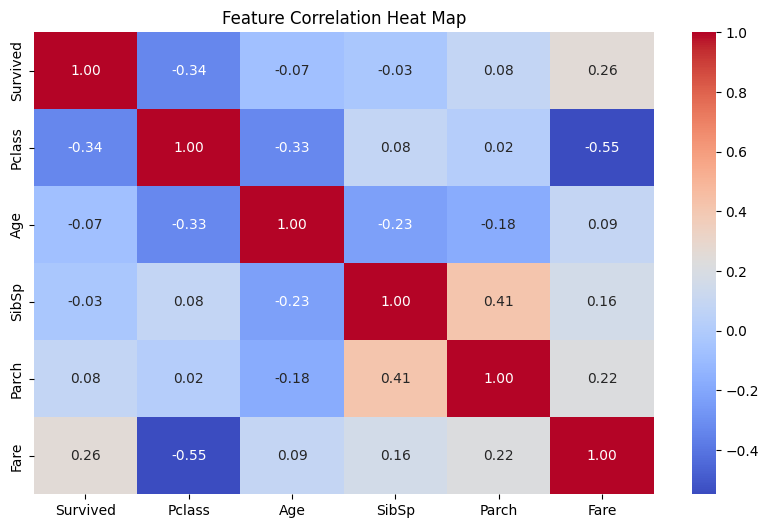

In [15]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heat Map")
plt.show()

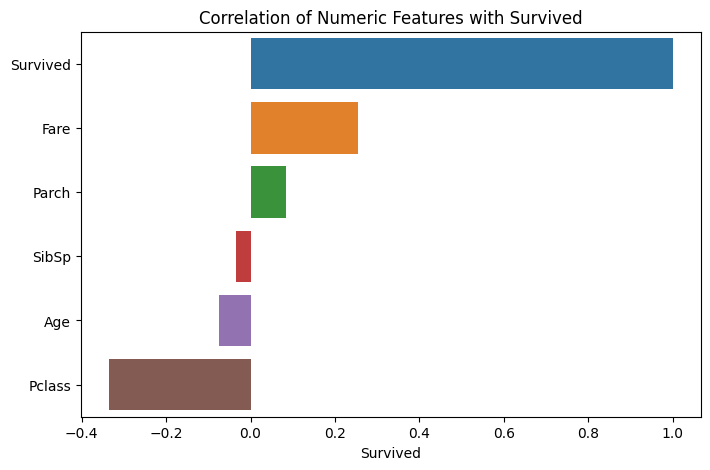

In [16]:
corr_with_target = df[numeric_cols].corr()['Survived'].sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_target, y=corr_with_target.index)
plt.title(f'Correlation of Numeric Features with Survived')
plt.show()

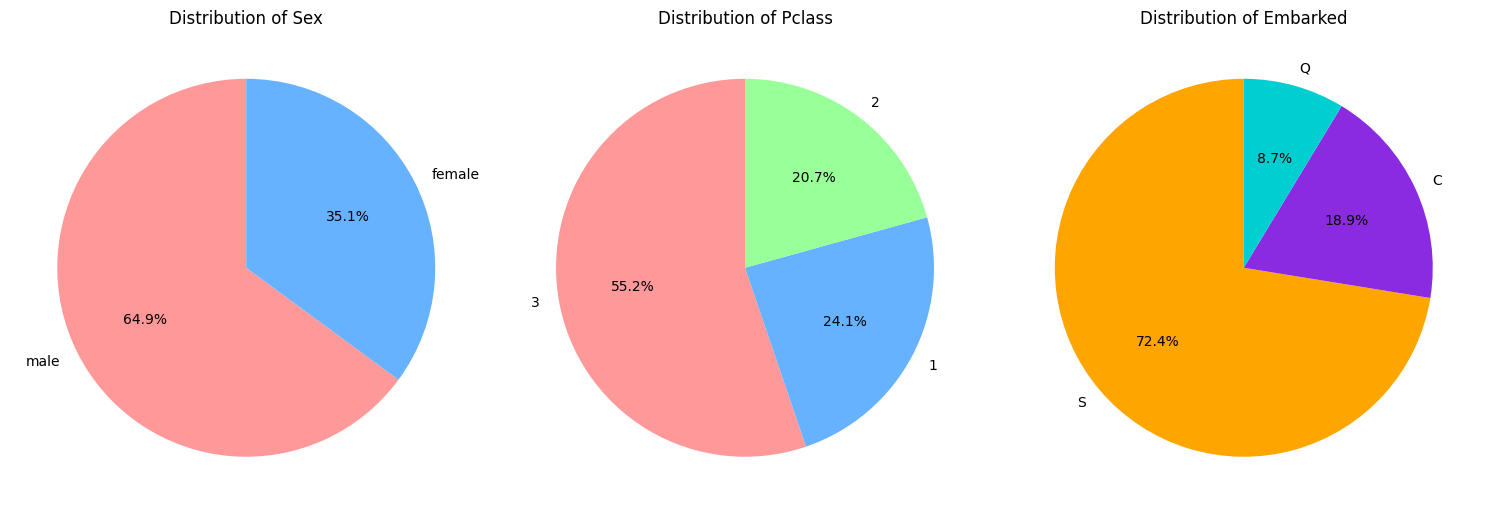

In [17]:

fig, axes = plt.subplots(1, 3, figsize=(15, 9))
axes = axes.flatten()

sex_counts = df['Sex'].value_counts()  
Pclass_counts = df['Pclass'].value_counts()
Embarked_counts =  df['Embarked'].value_counts()

axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF'])
axes[0].set_title('Distribution of Sex')

axes[1].pie(Pclass_counts, labels=Pclass_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF','#99FF99'])
axes[1].set_title('Distribution of Pclass')

axes[2].pie(Embarked_counts, labels=Embarked_counts.index, autopct='%1.1f%%', startangle=90, colors= ['#FFA500', '#8A2BE2', '#00CED1']  )
axes[2].set_title('Distribution of Embarked')

plt.tight_layout()
plt.show()

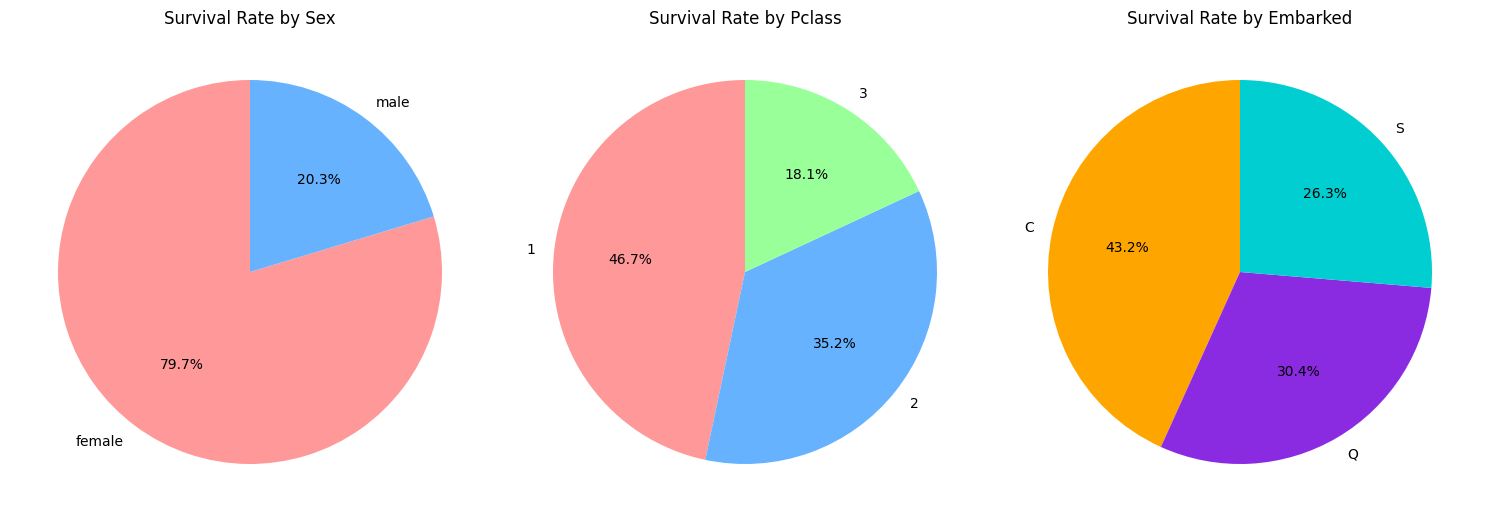

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 9))
axes = axes.flatten()

survival_sex = df.groupby('Sex')['Survived'].mean() * 100
Pclass_sex = df.groupby('Pclass')['Survived'].mean() * 100
Embarked_sex = df.groupby('Embarked')['Survived'].mean() * 100

axes[0].pie(survival_sex, labels=survival_sex.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF'])
axes[0].set_title('Survival Rate by Sex')

axes[1].pie(Pclass_sex, labels=Pclass_sex.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF','#99FF99'])
axes[1].set_title('Survival Rate by Pclass')

axes[2].pie(Embarked_sex, labels=Embarked_sex.index, autopct='%1.1f%%', startangle=90, colors= ['#FFA500', '#8A2BE2', '#00CED1']  )
axes[2].set_title('Survival Rate by Embarked')

plt.tight_layout()
plt.show()



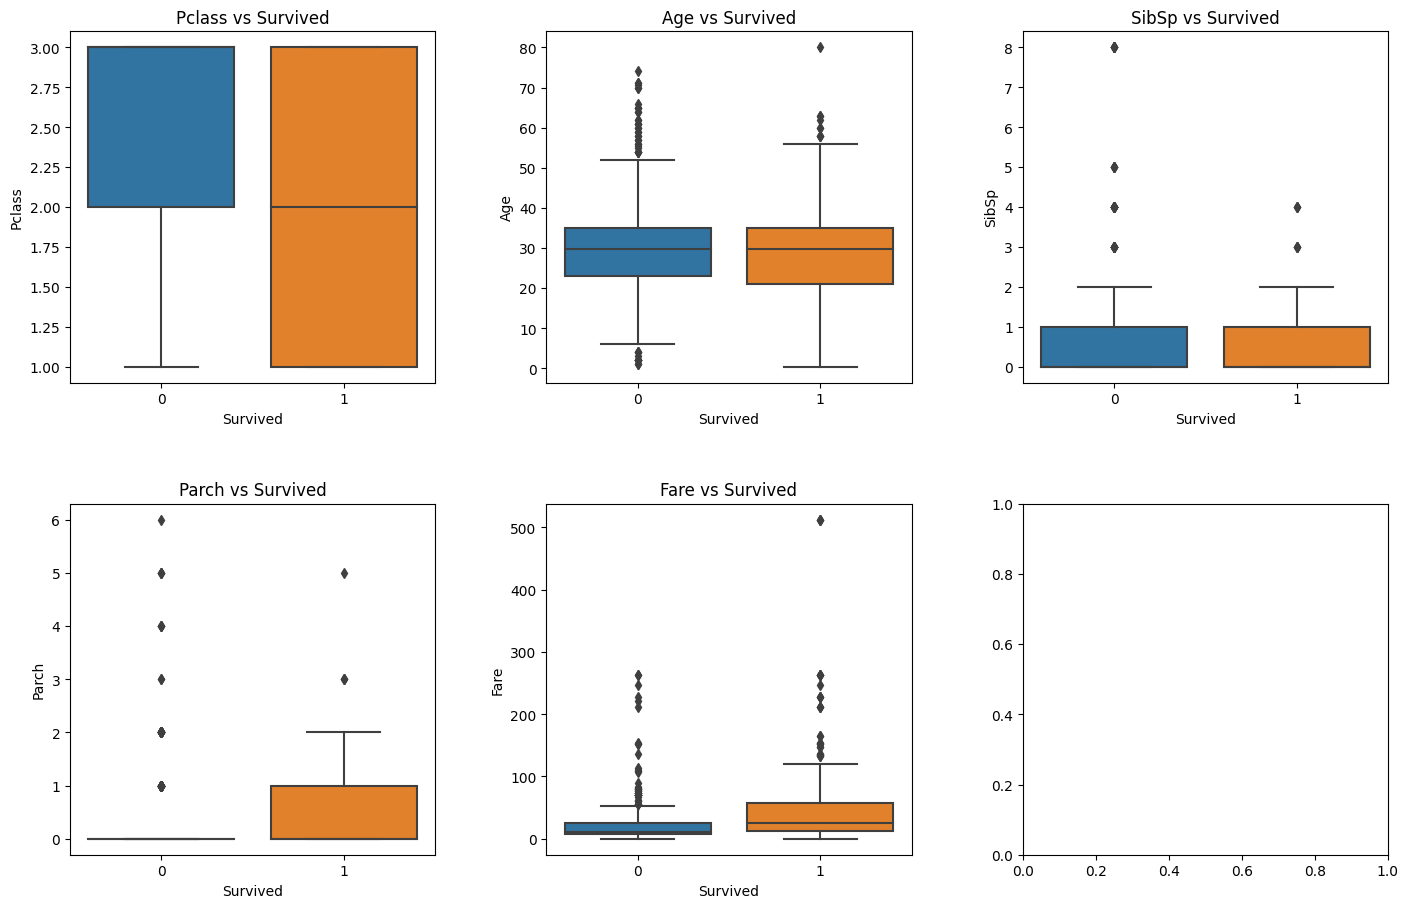

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df[numeric_cols].columns[1:]):
    sns.boxplot(x='Survived', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Survived')

plt.tight_layout(pad=4.0)
plt.show()

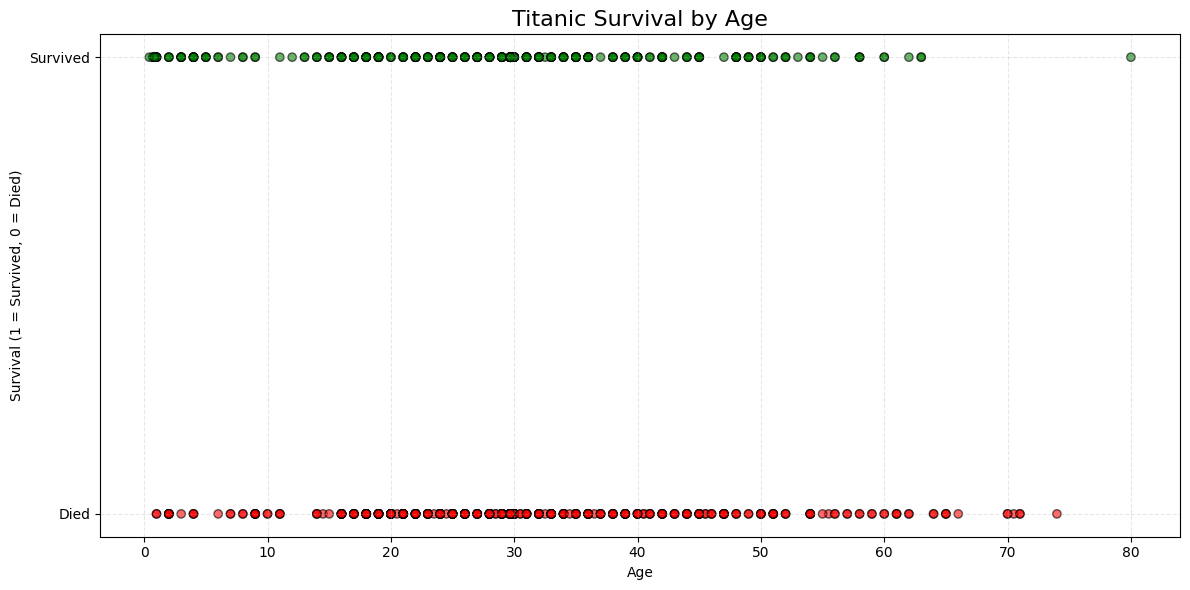

In [20]:
colors = df['Survived'].map({1: 'green', 0: 'red'})
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Survived'], c=colors, alpha=0.6, edgecolors='k')
plt.title('Titanic Survival by Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Survival (1 = Survived, 0 = Died)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.yticks([0, 1], ['Died', 'Survived'])
plt.tight_layout()


### ⚙️ Step 5 —  Feature Extraction

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
df["FamilySize"] = df["Parch"] + df["SibSp"] + 1
df["IsAlone"] = np.where(df["FamilySize"] == 1, 1, 0)
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100], labels=["Child","Teen","YoungAdult","Adult","Senior"])
df["IsChild"] = np.where(df["AgeGroup"] == "Child",1,0)
df["FamilyCategory"] = df["FamilySize"].apply(lambda x: "Single" if x==1 else ("Small" if x<=4 else "Large"))

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup,IsChild,FamilyCategory
0,0,3,male,22.0,1,0,7.2500,S,2,0,YoungAdult,0,Small
1,1,1,female,38.0,1,0,71.2833,C,2,0,Adult,0,Small
2,1,3,female,26.0,0,0,7.9250,S,1,1,YoungAdult,0,Single
3,1,1,female,35.0,1,0,53.1000,S,2,0,YoungAdult,0,Small
4,0,3,male,35.0,0,0,8.0500,S,1,1,YoungAdult,0,Single


### ⚙️ Step 6 —  Data Visualization (after features extraction)

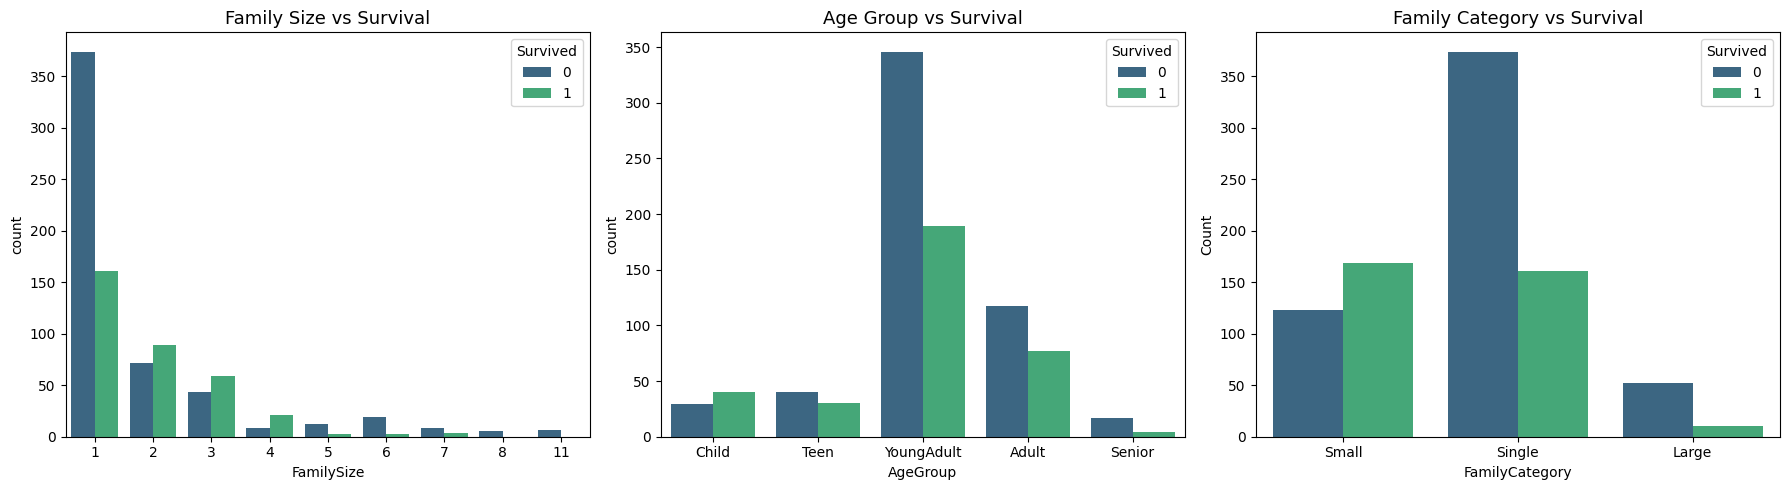

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x="FamilySize", hue="Survived", data=df, palette="viridis",ax=axes[0])
axes[0].set_title('Family Size vs Survival', fontsize=13)
plt.xlabel("Family Size")
plt.ylabel("Count")

sns.countplot(x="AgeGroup", hue="Survived", data=df, palette="viridis", ax=axes[1])
axes[1].set_title('Age Group vs Survival', fontsize=13)
plt.xlabel("AgeGroup")
plt.ylabel("Count")

sns.countplot(x="FamilyCategory", hue="Survived", data=df, palette="viridis", ax=axes[2])
axes[2].set_title('Family Category vs Survival', fontsize=13)
plt.xlabel("FamilyCategory")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

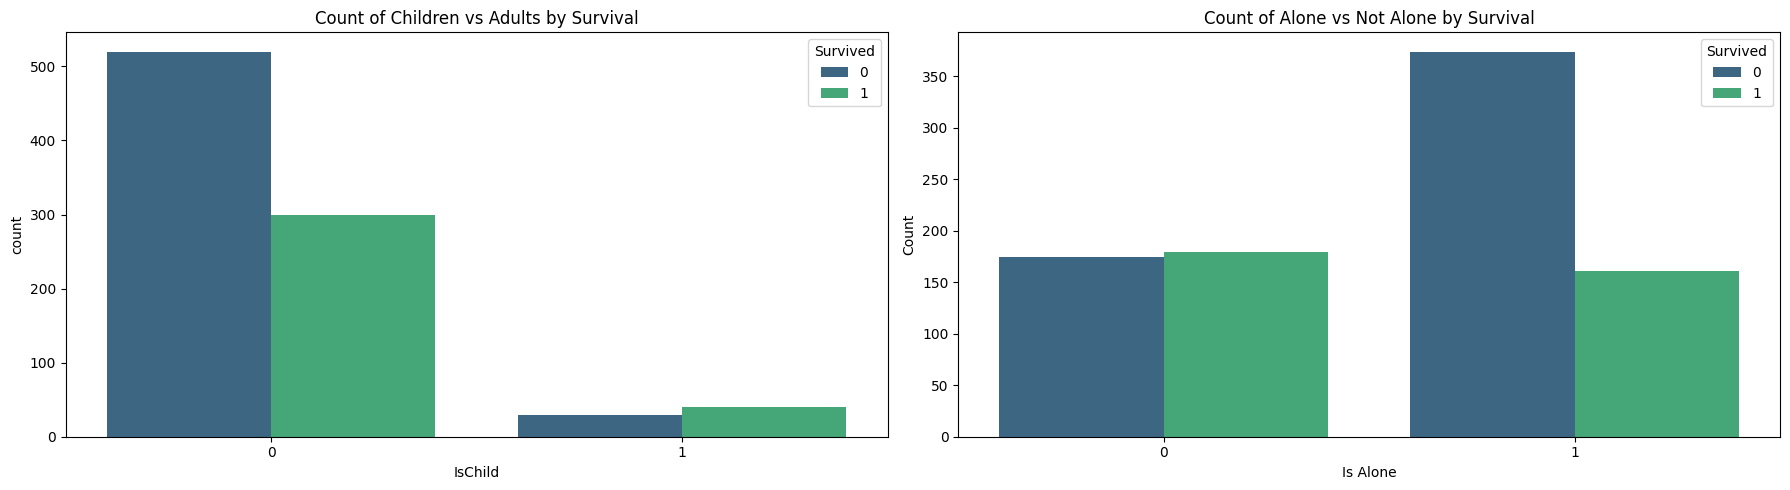

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.countplot(x="IsChild", hue="Survived", data=df, palette="viridis",ax=axes[0])
axes[0].set_title('Count of Children vs Adults by Survival')
plt.xlabel("Is Child")
plt.ylabel("Count")

sns.countplot(x="IsAlone", hue="Survived", data=df, palette="viridis",ax=axes[1])
axes[1].set_title('Count of Alone vs Not Alone by Survival')
plt.xlabel("Is Alone")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### ⚙️ Step 7 —  Feature Selection

In [25]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["AgeGroup"] = le.fit_transform(df["AgeGroup"])
df["FamilyCategory"] = le.fit_transform(df["FamilyCategory"])


df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,AgeGroup,IsChild,FamilyCategory,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,2,0,4,0,2,False,True
1,1,1,0,38.0,1,0,71.2833,2,0,0,0,2,False,False
2,1,3,0,26.0,0,0,7.9250,1,1,4,0,1,False,True
3,1,1,0,35.0,1,0,53.1000,2,0,4,0,2,False,True
4,0,3,1,35.0,0,0,8.0500,1,1,4,0,1,False,True


In [27]:
df.corr(numeric_only=True)["Survived"].sort_values(ascending=False)


Survived          1.000000
FamilyCategory    0.285670
Fare              0.255290
IsChild           0.117741
Parch             0.083151
FamilySize        0.018277
Embarked_Q        0.004536
SibSp            -0.034040
AgeGroup         -0.064777
Age              -0.074673
Embarked_S       -0.151777
IsAlone          -0.206207
Pclass           -0.335549
Sex              -0.541585
Name: Survived, dtype: float64

In [28]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=44, shuffle =True)

### Step 8 — Trying Different Classification Models

In this step, we will try several classification algorithms to compare their performance and determine which model best predicts the target variable (Survived in this case).
Each model will be trained on the training set and evaluated using Recall, Precision, and F1 Score — essential metrics for classification tasks.
Additionally, a Confusion Matrix will be displayed for each model to visualize prediction accuracy.

#### 🧠 Models to be tested:

**Random Forest Classifier** — an ensemble of decision trees that reduces overfitting and improves prediction stability.

**Gradient Boosting Classifier** — builds trees sequentially, each one correcting the previous model’s errors.

**Gaussian Naïve Bayes** — a probabilistic model assuming feature independence, often works surprisingly well for categorical data.

**Logistic Regression** — a simple linear model that estimates the probability of a class using the logistic function.

**Linear Discriminant Analysis (LDA)** — projects data onto a lower-dimensional space that maximizes class separability.

**K-Nearest Neighbors (KNN)** — classifies data points based on the majority label of their nearest neighbors

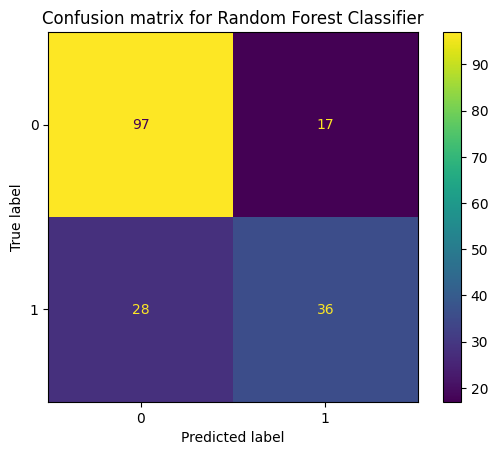

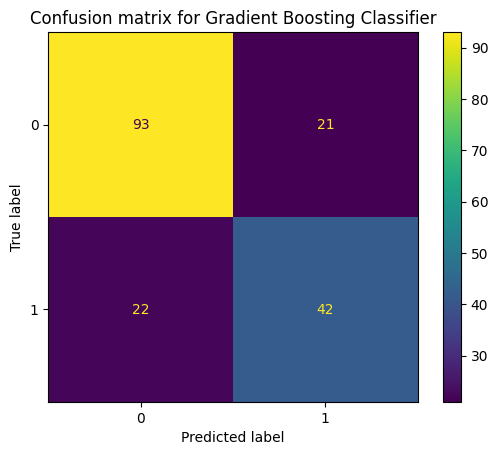

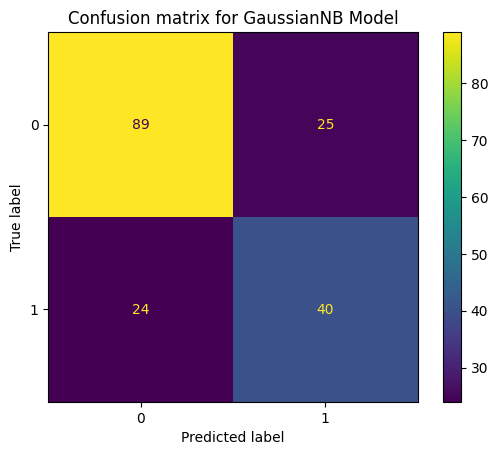

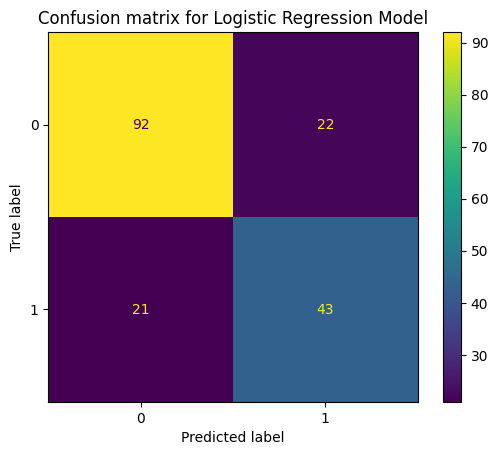

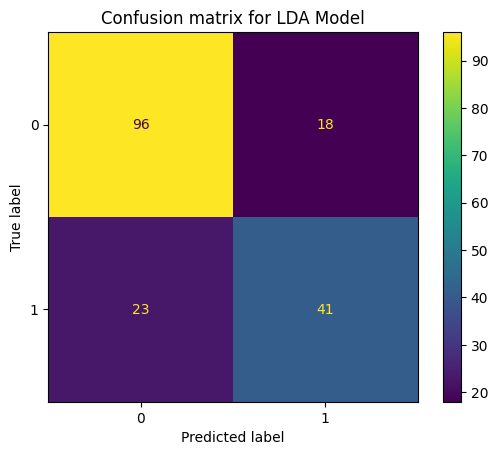

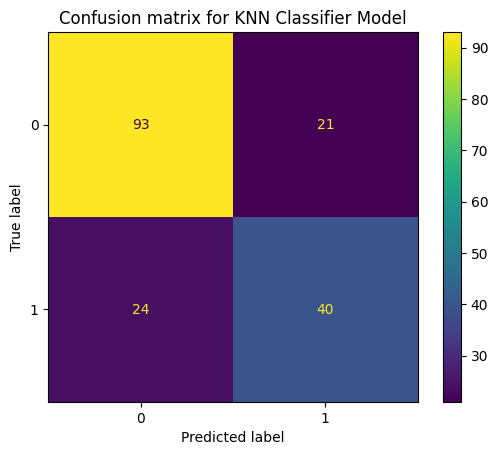

                          Model  Recall Score  Precision Score   F1Score
0      Random Forest Classifier      0.747191         0.747191  0.747191
1  Gradient Boosting Classifier      0.758427         0.758427  0.758427
2              GaussianNB Model      0.724719         0.724719  0.724719
3     Logistic Regression Model      0.758427         0.758427  0.758427
4                     LDA Model      0.769663         0.769663  0.769663
5          KNN Classifier Model      0.747191         0.747191  0.747191


In [31]:
models = {
    "Random Forest Classifier": RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33),
    "GaussianNB Model": GaussianNB(),
    "Logistic Regression Model": LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33),
    "LDA Model": LinearDiscriminantAnalysis(n_components=1, solver='svd', tol=0.0001),
    "KNN Classifier Model": KNeighborsClassifier(n_neighbors= 5,weights ='uniform', algorithm='auto')

}

results = []


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    RecallScore = recall_score(y_test, y_pred, average='micro')
    PrecisionScore = precision_score(y_test, y_pred, average='micro') 
    F1Score = f1_score(y_test, y_pred, average='micro') 

    results.append({
        "Model": name,
        "Recall Score": RecallScore,
        "Precision Score": PrecisionScore,
        "F1Score": F1Score
    })
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion matrix for {name}")
    plt.show()

results_df = pd.DataFrame(results)
print(results_df)





### ⚙️ Step 9 — Hyperparameter Tuning for Gradient Boosting Classifier

In this step, we will optimize the **Gradient Boosting Classifier** by performing **Hyperparameter Tuning** using  
`GridSearchCV`. This process systematically tests multiple combinations of hyperparameters to find the  
configuration that yields the best model performance.

In [32]:
gb = GradientBoostingClassifier(random_state=33)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='f1',    
    cv=5,           
    n_jobs=-1,      
    verbose=0       
)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best F1 Score: 0.7897535797535797


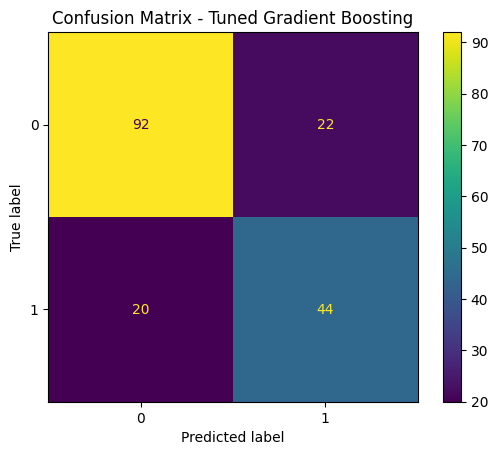

In [33]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

RecallScore = recall_score(y_test, y_pred, average='micro')
PrecisionScore = precision_score(y_test, y_pred, average='micro') 
F1Score = f1_score(y_test, y_pred, average='micro') 
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Tuned Gradient Boosting")
plt.show()

### ⚙️ Step 10 — Preparing the Test Data & Generating Submission File

In this step, we prepare the test dataset using the same preprocessing pipeline applied to the training data.
After that, we use the best model from GridSearchCV to predict survival outcomes and create the final submission file for Kaggle




In [34]:
TestData = pd.read_csv("/kaggle/input/titanic/test.csv")
passenger_ids = TestData["PassengerId"]
TestData = TestData.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
TestData["Age"] = TestData["Age"].fillna(TestData['Age'].mean())
TestData["Fare"] = TestData["Fare"].fillna(TestData["Fare"].mean())

TestData["FamilySize"] = TestData["Parch"] + TestData["SibSp"] + 1
TestData["IsAlone"] = np.where(TestData["FamilySize"] == 1, 1, 0)
TestData["AgeGroup"] = pd.cut(TestData["Age"], bins=[0, 12, 18, 35, 60, 100], labels=["Child","Teen","YoungAdult","Adult","Senior"])
TestData["IsChild"] = np.where(TestData["AgeGroup"] == "Child",1,0)
TestData["FamilyCategory"] = TestData["FamilySize"].apply(lambda x: "Single" if x==1 else ("Small" if x<=4 else "Large"))


TestData["Sex"] = le.fit_transform(TestData["Sex"])
TestData["AgeGroup"] = le.fit_transform(TestData["AgeGroup"])
TestData["FamilyCategory"] = le.fit_transform(TestData["FamilyCategory"])

TestData = pd.get_dummies(TestData, columns=['Embarked'], drop_first=True)

Test_scaled = scaler.transform(TestData)





In [35]:
y_pred_test = best_model.predict(Test_scaled)

submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": y_pred_test
})

submission.to_csv("Titanic_Submission.csv", index=False)
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
